<a href="https://colab.research.google.com/github/Shivangi12974/Customer_Classified_Project/blob/main/Customer%20Classified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [6]:
np.random.seed(42)

In [9]:
n_customers = 500
ages = np.random.randint(18,70,n_customers)
genders= np.random.randint(0,2,n_customers)
income = np.random.normal(50,15,n_customers).round(2)
purchase_freq = np.random.poisson(3,n_customers)

churn = ((income<40) & (purchase_freq < 3)).astype(int)
df_customers = pd.DataFrame({
    'Age': ages,
    'Gender': genders,
    'Income': income,
    'PurchaseFrequency': purchase_freq,
    'Churn': churn
})
# save to csv
df_customers.to_csv("customers.csv",index=False)

print("Customer data created and saved to'customers.csv")
print(df_customers.head())

Customer data created and saved to'customers.csv
   Age  Gender  Income  PurchaseFrequency  Churn
0   26       1   39.54                  5      0
1   58       0   35.69                  2      1
2   51       0   43.77                  3      0
3   62       0   33.11                  5      0
4   30       1   53.23                  4      0


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
df=pd.read_csv('customers.csv')
df.head

<bound method NDFrame.head of      Age  Gender  Income  PurchaseFrequency  Churn
0     26       1   39.54                  5      0
1     58       0   35.69                  2      1
2     51       0   43.77                  3      0
3     62       0   33.11                  5      0
4     30       1   53.23                  4      0
..   ...     ...     ...                ...    ...
495   51       1   60.62                  5      0
496   18       0   44.75                  3      0
497   36       1   46.96                  1      0
498   19       0   45.62                  4      0
499   38       1   43.94                  1      0

[500 rows x 5 columns]>

In [16]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                500 non-null    int64  
 1   Gender             500 non-null    int64  
 2   Income             500 non-null    float64
 3   PurchaseFrequency  500 non-null    int64  
 4   Churn              500 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 19.7 KB


,0
Age,0
Gender,0
Income,0
PurchaseFrequency,0
Churn,0


In [17]:
#Data info and check for nulls
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                500 non-null    int64  
 1   Gender             500 non-null    int64  
 2   Income             500 non-null    float64
 3   PurchaseFrequency  500 non-null    int64  
 4   Churn              500 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 19.7 KB


,0
Age,0
Gender,0
Income,0
PurchaseFrequency,0
Churn,0


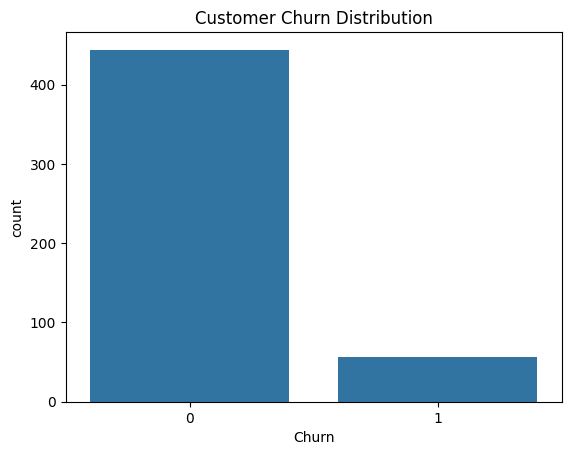

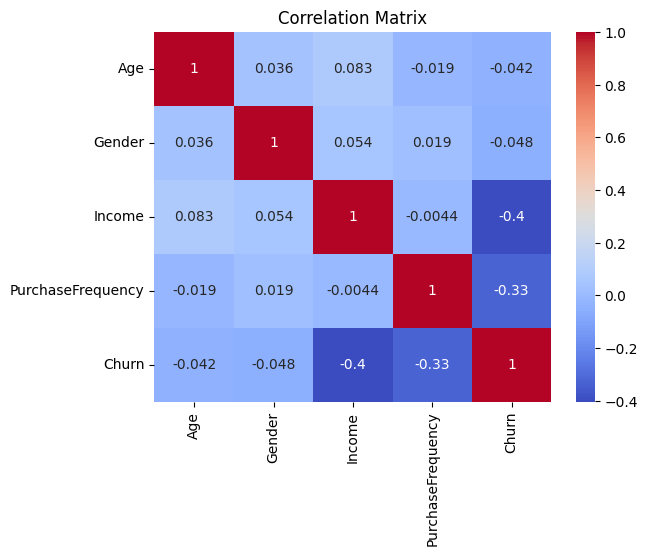

In [18]:
# Churn distribution
sns.countplot (data=df, x='Churn' )
plt.title ( "Customer Churn Distribution")
plt.show()
# Correlation matrix
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title ("Correlation Matrix")
plt.show()

In [23]:
x = df.drop("Churn",axis=1)
y = df["Churn"]
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

Accuracy: 0.95
Confusion Matrix:
 [[86  1]
 [ 4  9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        87
           1       0.90      0.69      0.78        13

    accuracy                           0.95       100
   macro avg       0.93      0.84      0.88       100
weighted avg       0.95      0.95      0.95       100



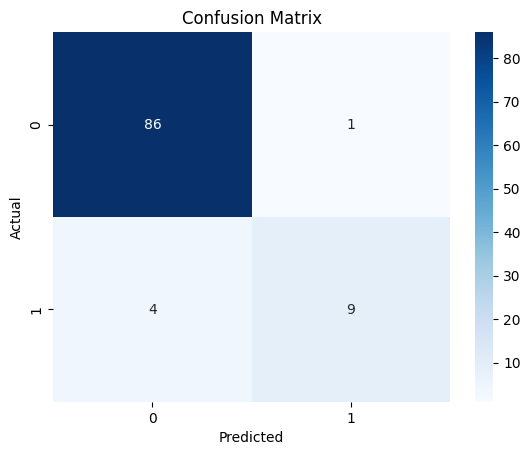

In [28]:
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(cm, annot=True, fmt="d", cmap ="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [30]:
new_customer = pd.DataFrame({
    'Age': [35],
    'Gender': [1],
    'Income': [45],
    'PurchaseFrequency': [2]
})
prediction = model.predict(new_customer)
if prediction == 1:
  print("This customer is likely to CHURN.Consider offering retention benefits.")
else:
  print("This customer is likely to Stay.Continue engagement as uaual.")

This customer is likely to Stay.Continue engagement as uaual.
